<a href="https://colab.research.google.com/github/congltk1234/HM_Fashion_Recommendation/blob/main/Notebook/ReduceMemory_PivotTable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, we gonna try to optimize memory usage in python (Pandas).

>[I. Load Data](#scrollTo=zOz2KlfS5p0L)

>[II. Reduce memory](#scrollTo=QopRWDcT51cD)

>>[1.Convert numerical datatypes to smaller ones](#scrollTo=75TC1PVh-7Xn)

>>[2.Convert categorical features to 'category' datatype](#scrollTo=sND3A9iDCje8)

>>[3.Result after converted](#scrollTo=l98yktwiCqIb)

>>>[Apply for Articles](#scrollTo=TqnHPRynC2wI)

>[III. Merge 2 dataframe](#scrollTo=_IeM1S2DDd9P)

>[Reference](#scrollTo=RlPRZo1yqo5a)



# I. Load Data

In [ ]:
!gdown 1fJClqbW9764Hf5uil0FMCRA6e1O0rLaW
!gdown 1-0KO4oEvB6CZ_vOfQLOiWjgxkthr8s4o
!gdown 1ayl5NO3rSPEKoGJ4gMTHKNg4Q0CifV40

Downloading...
From: https://drive.google.com/uc?id=1fJClqbW9764Hf5uil0FMCRA6e1O0rLaW
To: /content/articles.csv
100% 36.1M/36.1M [00:00<00:00, 266MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0KO4oEvB6CZ_vOfQLOiWjgxkthr8s4o
To: /content/transactions_train.csv
100% 3.49G/3.49G [00:14<00:00, 240MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ayl5NO3rSPEKoGJ4gMTHKNg4Q0CifV40
To: /content/customers.csv
100% 207M/207M [00:01<00:00, 170MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import plotly.express as px
import matplotlib.image as mpimg
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots
from termcolor import colored
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
articles = pd.read_csv("/content/articles.csv")
customers = pd.read_csv("/content/customers.csv")
transactions = pd.read_csv("/content/transactions_train.csv")

In [ ]:
#@title Extract Day, Month, Year, Weekday from date
# https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas
# https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'], format='%Y-%m-%d')
transactions['day'] = transactions['t_dat'].dt.day 
transactions['month'] = transactions['t_dat'].dt.month 
transactions['year'] = transactions['t_dat'].dt.year 
transactions['weekday'] =  transactions['t_dat'].dt.day_name()
transactions.sample(20)

,t_dat,customer_id,article_id,price,sales_channel_id,day,month,year,weekday
23523661,2020-03-18,fd27d8f01c40a6be716041546da5bb292f3c1482afcc81...,850917005,0.025407,2,18,3,2020,Wednesday
29859763,2020-08-03,92455497114b53d35e6eda672a330e77efb811c086a7b2...,857574005,0.025407,2,3,8,2020,Monday
4247756,2018-12-27,a714cdb8cb9fc12121c61c55883957881d07386f3d8346...,676123001,0.033881,2,27,12,2018,Thursday
8388822,2019-04-06,8235e8b39876f5ce5181c0123b135d1058f51248cb49e6...,569986002,0.017610,2,6,4,2019,Saturday
11759006,2019-06-13,6b0cb1731d108605e6ce441c0d1276aafa07c6870386a5...,351484002,0.015237,2,13,6,2019,Thursday
12458604,2019-06-23,90961159fe7684ff6988adfaa94854e1269d33f69a01b0...,795780001,0.016932,2,23,6,2019,Sunday
3775593,2018-12-16,69bb5b64615c5a0f378d3d1cb8f12a14dc714e788decca...,673799002,0.033881,2,16,12,2018,Sunday
9944370,2019-05-07,87527f370c8e5e6df5d260df6163b1cfe8b093a16743a3...,737852001,0.042356,2,7,5,2019,Tuesday
30313227,2020-08-13,76f8d64d68923b09ef788f6c6590b6aff0607a5c437922...,882882005,0.050831,2,13,8,2020,Thursday
24770766,2020-04-17,eb619c700fafd8d2cda30e2921d3dc3d43a0764e9b7365...,212629004,0.025407,2,17,4,2020,Friday


# II. Reduce memory

https://www.kaggle.com/code/jonas0/reduce-memory-usage-tutorial

In [ ]:
# Before Reduce: (2.1GB)
print("shape of train_transaction: ", transactions.shape, "\n")
print("info of train_transaction: \n")
print(transactions.info())

shape of train_transaction:  (31788324, 9) 

info of train_transaction: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
 5   day               int64         
 6   month             int64         
 7   year              int64         
 8   weekday           object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 2.1+ GB
None


In [ ]:
#@title Lists of columns (numerical & categorical features)
def list_of_col(dataframe):
  """
  Creates lists of numerical & categorical columns from given dataframe
    Parameters
    ----------
    dataframe : pandas.core.frame.DataFrame
        The DataFrame to get columns.
        
    Returns
    -------
    cat_cols : list
    num_cols : list
  """
  c = (dataframe.dtypes == 'object')
  n = (dataframe.dtypes != 'object')
  cat_cols = list(c[c].index)
  num_cols = list(n[n].index) 

  return cat_cols, num_cols


cat_cols, num_cols = list_of_col(transactions)
print(cat_cols, "\n")
print("number categorical features: ", len(cat_cols), "\n\n")
print(num_cols, "\n")
print("number numerical features: ", len(num_cols))

['customer_id', 'weekday'] 

number categorical features:  2 


['t_dat', 'article_id', 'price', 'sales_channel_id', 'day', 'month', 'year'] 

number numerical features:  7


## 1.Convert numerical datatypes to smaller ones

The int/float datatypes have the following ranges:

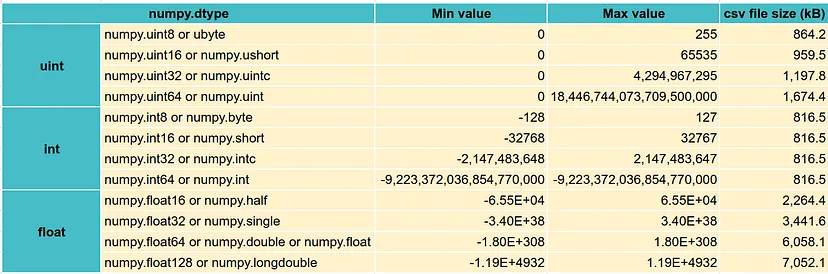

 These ranges are the same for all float datatypes.

      By default all numerical columns in pandas are in `int64` or `float64`.

 This means that when we find a numerical integer column whose 
 values do not exceed one of the ranges shown above, `we can then
 convert this datatype down to a smaller one`. 

In [ ]:
#@title Detects all the convertable numerical columns

def detect_num_cols_to_shrink(list_of_num_cols, dataframe):
    """
    Detects all the numerical columns, that can be converted to a smaller datatype.

      Parameters
      ----------
      list_of_num_cols : list
          The numerical columns.

      dataframe : pandas.core.frame.DataFrame
          The DataFrame to get convertable columns.
          
      Returns
      -------
      list_of_lists : list

    """
  
    convert_to_int8 = []
    convert_to_int16 = []
    convert_to_int32 = []
    
    #  sadly the datatype float8 does not exist
    convert_to_float16 = []
    convert_to_float32 = []
    
    for col in list_of_num_cols:
        
        if dataframe[col].dtype in ['int', 'int8', 'int32', 'int64']:
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 255:
                convert_to_int8.append(col)
            elif diff < 65535:
                convert_to_int16.append(col)
            elif diff < 4294967295:
                convert_to_int32.append(col)   
                
        elif dataframe[col].dtype in ['float', 'float16', 'float32', 'float64']:
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 65535:
                convert_to_float16.append(col)
            elif diff < 4294967295:
                convert_to_float32.append(col) 
        
    list_of_lists = []
    list_of_lists.append(convert_to_int8)
    list_of_lists.append(convert_to_int16)
    list_of_lists.append(convert_to_int32)
    list_of_lists.append(convert_to_float16)
    list_of_lists.append(convert_to_float32)
    
    return list_of_lists

In [ ]:
num_cols_to_shrink_trans = detect_num_cols_to_shrink(num_cols, transactions)

convert_to_int8 = num_cols_to_shrink_trans[0]
convert_to_int16 = num_cols_to_shrink_trans[1]
convert_to_int16.append(convert_to_int8.pop())
convert_to_int32 = num_cols_to_shrink_trans[2]

convert_to_float16 = num_cols_to_shrink_trans[3]
convert_to_float32 = num_cols_to_shrink_trans[4]

print("convert_to_int8 :", convert_to_int8, "\n")
print("convert_to_int16 :", convert_to_int16, "\n")
print("convert_to_int32 :", convert_to_int32, "\n")

print("convert_to_float16 :", convert_to_float16, "\n")
print("convert_to_float32 :", convert_to_float32, "\n")

convert_to_int8 : ['sales_channel_id', 'day', 'month'] 

convert_to_int16 : ['year'] 

convert_to_int32 : ['article_id'] 

convert_to_float16 : ['price'] 

convert_to_float32 : [] 



In [ ]:
#@title Convert to suitable type
print("starting with converting process....")

# convert the datatypes with .astype() 

for col in convert_to_int8:
    transactions[col] = transactions[col].astype('int8')  
    
for col in convert_to_int16:
    transactions[col] = transactions[col].astype('int16')

for col in convert_to_int32:
    transactions[col] = transactions[col].astype('int32') 

for col in convert_to_float16:
    transactions[col] = transactions[col].astype('float16')

    
print("successfully converted!")
transactions.info()

starting with converting process....
successfully converted!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int32         
 3   price             float16       
 4   sales_channel_id  int8          
 5   day               int8          
 6   month             int8          
 7   year              int64         
 8   weekday           object        
dtypes: datetime64[ns](1), float16(1), int32(1), int64(1), int8(3), object(2)
memory usage: 1.2+ GB


## 2.Convert categorical features to 'category' datatype

In [ ]:
# Convert categorical features to 'category' datatype
for i in cat_cols:
    
    transactions[i] = transactions[i].astype('category')
    
print("successfully converted all categorical features!")

successfully converted all categorical features!


## 3.Result after converted

In [ ]:
#@title Transaction info
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       category      
 2   article_id        int32         
 3   price             float16       
 4   sales_channel_id  int8          
 5   day               int8          
 6   month             int8          
 7   year              int64         
 8   weekday           category      
dtypes: category(2), datetime64[ns](1), float16(1), int32(1), int64(1), int8(3)
memory usage: 952.1 MB


### Apply for Articles

In [ ]:
articles = pd.read_csv("/content/articles.csv")

articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
cat_cols, num_cols = list_of_col(articles)
print(cat_cols, "\n")
print("number categorical features: ", len(cat_cols), "\n\n")
print(num_cols, "\n")
print("number numerical features: ", len(num_cols))


num_cols_to_shrink_trans = detect_num_cols_to_shrink(num_cols, articles)

convert_to_int8 = num_cols_to_shrink_trans[0]
convert_to_int16 = num_cols_to_shrink_trans[1]
convert_to_int32 = num_cols_to_shrink_trans[2]

convert_to_float16 = num_cols_to_shrink_trans[3]
convert_to_float32 = num_cols_to_shrink_trans[4]

print("convert_to_int8 :", convert_to_int8, "\n")
print("convert_to_int16 :", convert_to_int16, "\n")
print("convert_to_int32 :", convert_to_int32, "\n")

print("convert_to_float16 :", convert_to_float16, "\n")
print("convert_to_float32 :", convert_to_float32, "\n")


print("starting with converting process....")

# convert the datatypes with .astype() 

for col in convert_to_int8:
    articles[col] = articles[col].astype('int8')  
    
for col in convert_to_int32:
    articles[col] = articles[col].astype('int32') 

for col in convert_to_float16:
    articles[col] = articles[col].astype('float16')

    
print("successfully converted!")


# Convert categorical features to 'category' datatype
for i in cat_cols:
    
    articles[i] = articles[i].astype('category')
    
print("successfully converted all categorical features!")


articles.info()

['prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_code', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc'] 

number categorical features:  14 


['article_id', 'product_code', 'product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_group_no', 'section_no', 'garment_group_no'] 

number numerical features:  11
convert_to_int8 : ['colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'index_group_no', 'section_no', 'garment_group_no'] 

convert_to_int16 : ['product_type_no', 'department_no'] 

convert_to_int32 : ['article_id', 'product_code', 'graphical_appearance_no'] 

convert_to_float16 : [] 

convert_to_float32 : [] 

starting with converting process....
successfully converted!
successful

In [ ]:
# Take neccessary columns
col = ['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'colour_group_name', 'index_name', 'garment_group_name']
articles = articles[col]
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   article_id          105542 non-null  int32   
 1   prod_name           105542 non-null  category
 2   product_type_name   105542 non-null  category
 3   product_group_name  105542 non-null  category
 4   colour_group_name   105542 non-null  category
 5   index_name          105542 non-null  category
 6   garment_group_name  105542 non-null  category
dtypes: category(6), int32(1)
memory usage: 2.8 MB


# III. Merge 2 dataframe

In [ ]:
merged_df = pd.merge(transactions, articles, on='article_id')
merged_df.sample(20)

,t_dat,customer_id,article_id,price,sales_channel_id,day,month,year,weekday,prod_name,product_type_name,product_group_name,colour_group_name,index_name,garment_group_name
1959723,2019-02-21,c9e009f0f0d106ef79a02620403abab4250621a44fc508...,636323005,0.014389,1,21,2,2019,Thursday,Skinny H.W Ankle Queens,Trousers,Garment Lower body,Dark Blue,Divided,Trousers Denim
3323110,2018-10-17,3eafa3b1ea94850e4d8214eaba9689a3c76a6974ad4b56...,237222001,0.016937,2,17,10,2018,Wednesday,Helsinki,Top,Garment Upper body,Black,Ladieswear,Jersey Basic
8564666,2018-10-26,68d0a781f45d78c35625b11788841f98a2c423e627a0ed...,696625001,0.016937,1,26,10,2018,Friday,XMAS santa aliceband,Alice band,Accessories,Red,Ladies Accessories,Accessories
10229332,2019-05-18,7c2fedbcf37990f2830b8c946d2e9f148bfa706d5379bb...,685816008,0.008461,1,18,5,2019,Saturday,RONNY R-NECK,T-shirt,Garment Upper body,Dark Green,Menswear,Jersey Basic
22384030,2019-09-12,dcdabcfd37b166a56850fdfd0d250d6bd0c605800f3e16...,756374001,0.015236,1,12,9,2019,Thursday,Bridget Price item,Sweater,Garment Upper body,Other Yellow,Divided,Unknown
24512221,2020-01-24,fbe98133b6cacf0b188aae6f5b76ce2586f486a82ad489...,877984001,0.022018,2,24,1,2020,Friday,Cassie LS (fast buy),Top,Garment Upper body,Black,Divided,Jersey Fancy
18243652,2019-07-24,947c1e2a197f34063e8d398a53532182ab5345e4000aad...,745247001,0.016937,1,24,7,2019,Wednesday,FIG STRAP S.0,Vest top,Garment Upper body,Black,Divided,Blouses
3064693,2019-09-19,532d1e8c80c68ce8972b4adab9a62bb71a3a661528d6f0...,562245046,0.033875,2,19,9,2019,Thursday,Luna skinny RW,Trousers,Garment Lower body,Black,Ladieswear,Trousers
15495016,2019-06-19,676625183b39242530f5f3fdeb157b5a9a064731f6153b...,764283001,0.025406,2,19,6,2019,Wednesday,Yo body,Bodysuit,Garment Upper body,Dark Pink,Ladieswear,Jersey Basic
10101920,2018-12-17,2c3ee5be34a0acde6edbbc3faeabd21ae72dd45de53c0f...,682325001,0.050842,1,17,12,2018,Monday,Copenhagen pile,Jacket,Garment Upper body,Light Beige,Divided,Outdoor


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   t_dat               datetime64[ns]
 1   customer_id         category      
 2   article_id          int32         
 3   price               float16       
 4   sales_channel_id    int8          
 5   day                 int8          
 6   month               int8          
 7   year                int64         
 8   weekday             category      
 9   prod_name           category      
 10  product_type_name   category      
 11  product_group_name  category      
 12  colour_group_name   category      
 13  index_name          category      
 14  garment_group_name  category      
dtypes: category(8), datetime64[ns](1), float16(1), int32(1), int64(1), int8(3)
memory usage: 1.5 GB


In [ ]:
#@title Pivot table for Total sold by weekday and year
pivot = pd.pivot_table(merged_df, values='article_id', index='weekday', columns='year', aggfunc='count')

# print the pivot table
pivot = pivot.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], :]
pivot

year,2018,2019,2020
weekday,,,
Monday,536842,2110798,1406414
Tuesday,513033,2208808,1476789
Wednesday,602267,2527457,1713097
Thursday,675075,2498932,1686588
Friday,745095,2399396,1604641
Saturday,742874,2555063,1751563
Sunday,596076,2096476,1341040


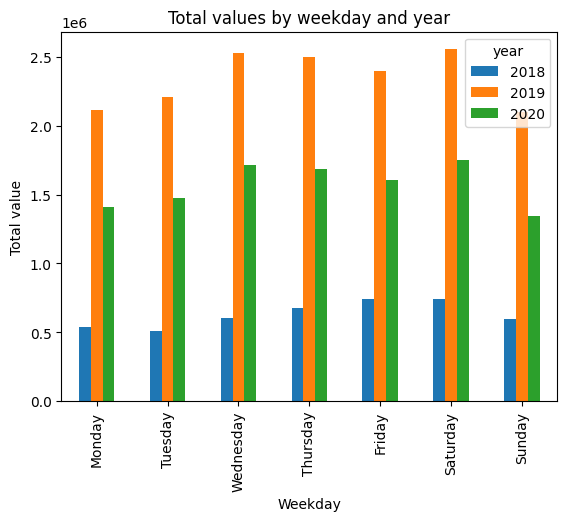

In [ ]:
# create a bar plot
pivot.plot(kind='bar', title='Total values by weekday and year')
plt.xlabel('Weekday')
plt.ylabel('Total value')
plt.show()

In [ ]:
#@title Pivot table for Total sold by garment_group_name and Weekday
pivot = pd.pivot_table(merged_df, values='article_id', index='garment_group_name', columns='weekday', aggfunc='count')

# change the order of the columns
pivot = pivot.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
garment_group_name,,,,,,,
Accessories,199701,210272,233675,254185,270225,285830,191576
Blouses,311763,323881,396379,385868,376816,401253,314481
Dressed,48778,52188,60473,63024,63860,71427,49785
Dresses Ladies,277177,295299,351547,336042,312174,311787,263503
Dresses/Skirts girls,6218,6468,8666,7967,8904,10751,6919
Jersey Basic,417205,431836,482758,487806,485200,538059,425587
Jersey Fancy,655389,685247,804913,786368,771967,815659,652068
Knitwear,290563,299793,339645,362933,378306,409520,312047
Outdoor,88910,91514,109309,108415,107318,116205,93905


# Reference
1. [Nhu Hoang - Optimize Memory Tips in Python](https://towardsdatascience.com/optimize-memory-tips-in-python-3bbb44512937)